In [1]:
pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# USING MP HOLISTICS

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converting color from BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make the detection 
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Converting color from RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:  
    while cap.isOpened():
        ret, frame = cap.read() 
        image, results = mediapipe_detection(frame, holistic) 
        draw_styled_landmarks(image, results) 
        print(results)
        cv2.imshow('OpenCV Feed', image) 
        if cv2.waitKey(10) & 0xFF == ord('q'): 
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'brea' is not defined

In [87]:
draw_landmarks(frame,results)

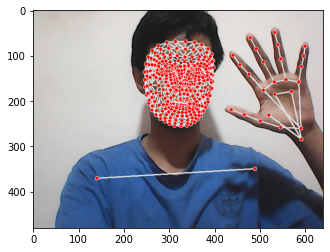

In [88]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoints Values 

In [9]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [7]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [91]:
result_test

array([ 0.50881153,  0.33597654, -0.85564804, ...,  0.        ,
        0.        ,  0.        ])

In [92]:
np.save('0', result_test) 

In [93]:
np.load('0.npy')

array([ 0.50881153,  0.33597654, -0.85564804, ...,  0.        ,
        0.        ,  0.        ])

# Setting up folders for data collection 

In [10]:
DATA_PATH = os.path.join('MP_Data') # Path for exported data, numpy arrays
actions = np.array(['oba', 'kavda', 'name','deaf and mute', 'population', 'in srilanka']) # Actions that we try to detect
no_sequences = 30 # Thirty videos worth of data
sequence_length = 30 # Videos are going to be 30 frames in length
start_folder = 30 # Folder start

In [85]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collecting keypoint values for test and train

In [86]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)  
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)  
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break     
    cap.release()
    cv2.destroyAllWindows()

In [10]:
 cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
label_map = {label:num for num, label in enumerate(actions)}

In [13]:
label_map

{'oba': 0,
 'kavda': 1,
 'name': 2,
 'deaf and mute': 3,
 'population': 4,
 'in srilanka': 5}

In [14]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [15]:
np.array(sequences).shape

(180, 30, 1662)

In [16]:
np.array(labels).shape

(180,)

In [17]:
X = np.array(sequences)

In [18]:
X.shape

(180, 30, 1662)

In [19]:
y = to_categorical(labels).astype(int)

In [20]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [139]:
y_test

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0]])

# Build and Train LSTM Neural Network

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

In [23]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)


In [24]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [25]:
res = [.7, 0.2, 0.1]

In [26]:
actions[np.argmax(res)]

'oba'

In [153]:
mc = ModelCheckpoint('best_model.h5', monitor='categorical_accuracy', mode='max',  verbose=1, save_best_only=True)

In [27]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [155]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback, mc])

Epoch 1/300
6/6 [==============================] - 5s 404ms/step - loss: 2.4119 - categorical_accuracy: 0.1950

Epoch 00001: categorical_accuracy improved from -inf to 0.18713, saving model to best_model.h5
Epoch 2/300
6/6 [==============================] - 1s 90ms/step - loss: 8.4387 - categorical_accuracy: 0.1465

Epoch 00002: categorical_accuracy did not improve from 0.18713
Epoch 3/300
6/6 [==============================] - 1s 92ms/step - loss: 1.8189 - categorical_accuracy: 0.1342

Epoch 00003: categorical_accuracy did not improve from 0.18713
Epoch 4/300
6/6 [==============================] - 1s 92ms/step - loss: 1.8868 - categorical_accuracy: 0.1672

Epoch 00004: categorical_accuracy did not improve from 0.18713
Epoch 5/300
6/6 [==============================] - 1s 92ms/step - loss: 2.0117 - categorical_accuracy: 0.1244

Epoch 00005: categorical_accuracy did not improve from 0.18713
Epoch 6/300
6/6 [==============================] - 1s 89ms/step - loss: 1.7626 - categorical_accu


Epoch 00045: categorical_accuracy did not improve from 0.76023
Epoch 46/300
6/6 [==============================] - 1s 93ms/step - loss: 0.8456 - categorical_accuracy: 0.6078

Epoch 00046: categorical_accuracy did not improve from 0.76023
Epoch 47/300
6/6 [==============================] - 1s 90ms/step - loss: 0.9518 - categorical_accuracy: 0.6209

Epoch 00047: categorical_accuracy did not improve from 0.76023
Epoch 48/300
6/6 [==============================] - 1s 93ms/step - loss: 0.9215 - categorical_accuracy: 0.6553

Epoch 00048: categorical_accuracy did not improve from 0.76023
Epoch 49/300
6/6 [==============================] - 1s 96ms/step - loss: 0.7484 - categorical_accuracy: 0.6886

Epoch 00049: categorical_accuracy did not improve from 0.76023
Epoch 50/300
6/6 [==============================] - 1s 96ms/step - loss: 0.4850 - categorical_accuracy: 0.8536

Epoch 00050: categorical_accuracy improved from 0.76023 to 0.86550, saving model to best_model.h5
Epoch 51/300
6/6 [========

KeyboardInterrupt: 

In [149]:
del model

In [156]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_25 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_26 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 198       
Total params: 596,774
Trainable params: 596,774
Non-trainable params: 0
________________________________________________

# Make Predictions

In [157]:
res = model.predict(X_test)

In [158]:
res

array([[4.5160275e-05, 1.3672923e-07, 9.9988675e-01, 3.9237769e-16,
        6.7983761e-05, 3.3815350e-11],
       [2.8132246e-05, 1.6674617e-06, 9.6803826e-13, 9.9997020e-01,
        8.6741664e-12, 2.8864189e-09],
       [3.9694147e-05, 1.4557735e-05, 9.7243793e-12, 9.9994576e-01,
        7.0864231e-11, 2.9965925e-08],
       [9.9091911e-01, 6.0916445e-03, 9.6024986e-04, 1.7901571e-04,
        1.0215609e-03, 8.2838652e-04],
       [1.4538621e-04, 1.3273200e-06, 9.9950695e-01, 6.4381985e-14,
        3.4637083e-04, 1.1562143e-09],
       [1.1792572e-03, 4.9223891e-05, 1.8787539e-05, 9.0693476e-08,
        9.1343945e-01, 8.5313171e-02],
       [9.8684525e-01, 6.6952435e-03, 2.2764674e-03, 2.0874623e-04,
        1.5647914e-03, 2.4096384e-03],
       [5.5213313e-04, 3.8400689e-05, 1.8526816e-07, 5.4127549e-06,
        1.6603945e-02, 9.8279989e-01],
       [2.5528113e-03, 3.9039817e-04, 1.1348407e-07, 9.9704844e-01,
        9.6796145e-07, 7.3992478e-06]], dtype=float32)

In [159]:
actions[np.argmax(res[3])]

'oba'

In [160]:
actions[np.argmax(y_test[3])]

'oba'

# Save Weights

In [161]:
model.save('actionfinal.h5')

In [28]:
model.load_weights('best_model.h5')

# Evalutaion using confusion matrix and Accuray

In [34]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report, confusion_matrix

In [35]:
confusion_matrix(y_test,yhat1)

NameError: name 'yhat1' is not defined

In [38]:
yhat1 = model.predict(X_train)

In [39]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat1, axis=1).tolist()

In [40]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[143,   0],
        [  1,  27]],

       [[141,   1],
        [  0,  29]],

       [[143,   0],
        [  1,  27]],

       [[142,   0],
        [  0,  29]],

       [[142,   1],
        [  5,  23]],

       [[137,   5],
        [  0,  29]]], dtype=int64)

In [41]:
print(classification_report(ytrue, yhat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.97      1.00      0.98        29
           2       1.00      0.96      0.98        28
           3       1.00      1.00      1.00        29
           4       0.96      0.82      0.88        28
           5       0.85      1.00      0.92        29

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [122]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import plot_roc_curve

In [104]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train[:,2])
ax = plt.gca()
label_1 = plot_roc_curve(clf, X_test, y_test[:,1], name= 'label 1', ax=ax, alpha=0.8)
label_0.plot(ax=ax, alpha=0.8)
plt.show()


ValueError: Found array with dim 3. LogisticRegression expected <= 2.

In [42]:
accuracy_score(ytrue, yhat)

0.9590643274853801

# Real Time

In [29]:
from scipy import stats

In [30]:
colors = [(245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

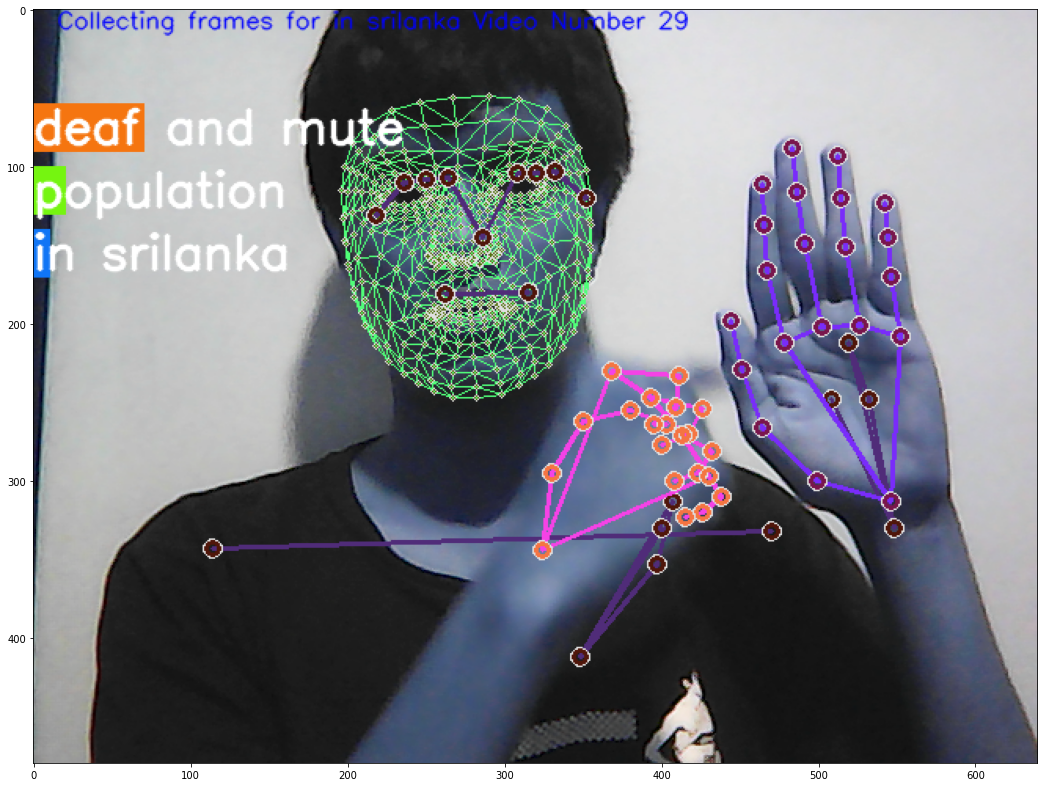

In [75]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [33]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.85

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        print("result")
        draw_styled_landmarks(image, results)
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            print("actions")
            predictions.append(np.argmax(res))
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            image = prob_viz(res, actions, image, colors)    
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA) 
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result


<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavd

<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
oba
actions
<class 'medi

<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result


<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result


<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf a

<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
in srilanka


<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions


<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
deaf and mute
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda
actions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
result
kavda


In [73]:
    cap.release()
    cv2.destroyAllWindows()

In [96]:
model.predict(X_test)

array([[4.1992907e-12, 9.9999857e-01, 1.3977142e-06],
       [1.7318523e-11, 9.9999523e-01, 4.8221277e-06],
       [8.8926249e-08, 3.1358859e-19, 9.9999988e-01],
       [2.8557058e-06, 2.9677252e-16, 9.9999714e-01],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [93]:
X_test[0].shape

(30, 1662)

In [62]:
print(sentence)

['your', 'whats', 'name', 'whats', 'your']


In [63]:
passedSentence = ' '.join(sentence)

In [64]:
print(passedSentence)

your whats name whats your
